In [1]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import funs.helpers_2 as he
import gc

np.random.seed(2024)
pd.set_option("display.max_columns", 500)

# Load data

In [2]:
rides = pd.read_pickle("../data/outputs/1.eda/rides_preprocessed.pkl")
weather = pd.read_pickle("../data/outputs/1.eda/weather_preprocessed.pkl")

In [3]:
rides

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693069,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [4]:
weather

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,2018-12-03 06:52:54,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,2018-12-03 06:52:54,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54


# Categorical data mapping

## rides data

In [5]:
places_coordinates = {
    'Financial District': (42.3601, -71.0571),
    'Back Bay': (42.3570, -71.0733),
    'Theatre District': (42.3500, -71.0622),
    'Boston University': (42.3505, -71.1054),
    'Haymarket Square': (42.3640, -71.0603),
    'Fenway': (42.3477, -71.0972),
    'Northeastern University': (42.3383, -71.0892),
    'North End': (42.3643, -71.0542),
    'South Station': (42.3522, -71.0550),
    'West End': (42.3663, -71.0651),
    'Beacon Hill': (42.3601, -71.0700),
    'North Station': (42.3655, -71.0625)
}
lat_dict = {x:y[0] for x, y in places_coordinates.items()}
lon_dict = {x:y[1] for x, y in places_coordinates.items()}

In [6]:
rides['source_latitude']=rides.source.map(lat_dict).astype(float)
rides['source_longitude']=rides.source.map(lon_dict).astype(float)
rides['dest_latitude']=rides.destination.map(lat_dict).astype(float)
rides['dest_longitude']=rides.destination.map(lon_dict).astype(float)

In [7]:
rides.groupby(['product_id','name']).aggregate({'id':'count'}).reset_index().query("id>0")

/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_12218/2556280467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides.groupby(['product_id','name']).aggregate({'id':'count'}).reset_index().query("id>0")


,product_id,name,id
9,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,55094
12,6c84fd89-3f11-4782-9b50-97c468b19529,Black,55095
25,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,55096
46,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,55096
56,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,55091
71,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,55096
77,lyft,Lyft,51235
91,lyft_line,Shared,51233
99,lyft_lux,Lux Black,51235
112,lyft_luxsuv,Lux Black XL,51235


In [8]:
rides=rides.drop(columns=['id','product_id'])

In [9]:
name_map={
    #lyft
    'Shared':1,
    'Lyft':2, 
    'Lyft XL':3,
    'Lux':4, 
    'Lux Black':5,
    'Lux Black XL':6, 
    # uber
    'UberPool':1,
    'WAV':2, 
    'UberX':3,
    'UberXL':4,
    'Black':5,
    'Black SUV':6
}

In [10]:
rides['name']=rides['name'].map(name_map)

In [11]:
rides = pd.concat([pd.get_dummies(rides['cab_type'],dtype=int),rides.drop(columns='cab_type')],axis=1)

## weather

In [12]:
weather

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,2018-12-03 06:52:54,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,2018-12-03 06:52:54,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,2018-12-03 06:52:54,0.96,1.54


# Missing values

In [13]:
rides.isna().sum()

Lyft                0
Uber                0
distance            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
name                0
source_latitude     0
source_longitude    0
dest_latitude       0
dest_longitude      0
dtype: int64

In [14]:
weather.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

<Axes: xlabel='time_stamp', ylabel='rain'>

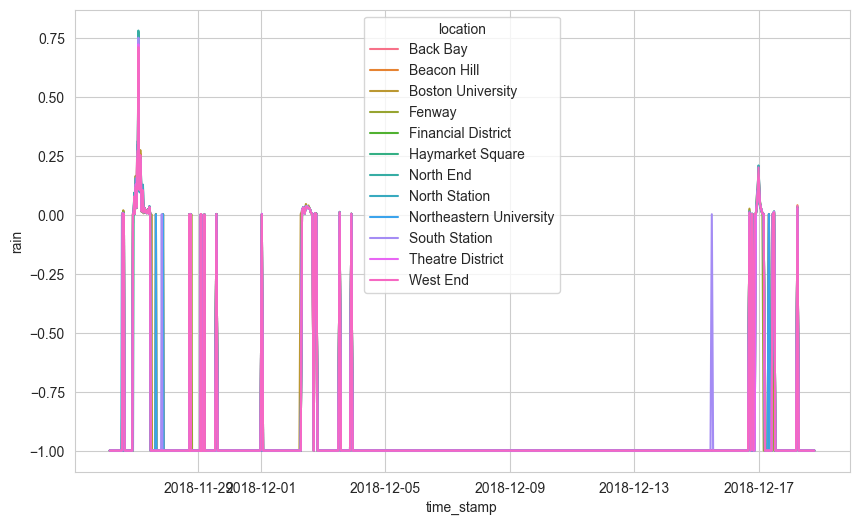

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=weather.time_stamp,y=weather.rain.fillna(-1),hue=weather.location)

<Axes: xlabel='time_stamp', ylabel='rain'>

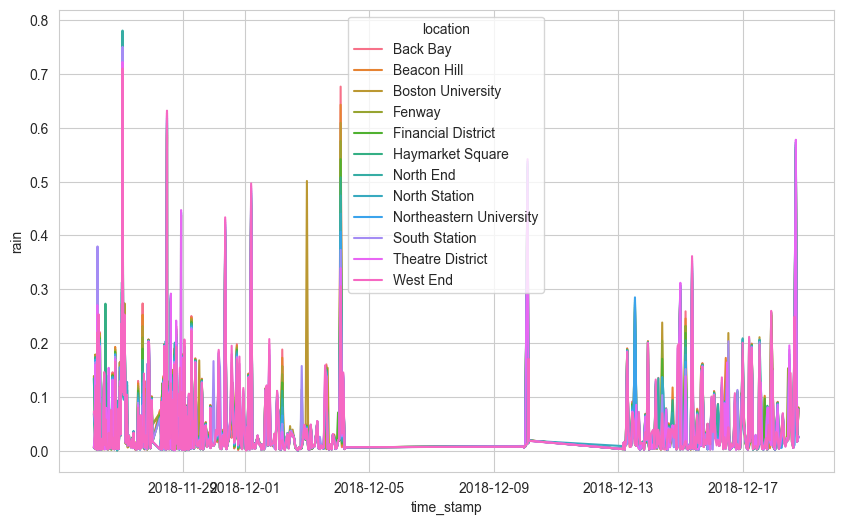

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(weather.set_index(['time_stamp','location'])['rain'].interpolate(method='linear').reset_index(),
            x='time_stamp',y='rain',hue='location')

In [17]:
weather['rain'] = (weather
 .set_index(['time_stamp','location'])['rain']
 .interpolate(method='linear')
 .reset_index()
 ['rain'])

# Merge data


Merge ride and weather data by rounding both to the nearest hour, with rides every 5 minutes and weather updates hourly.

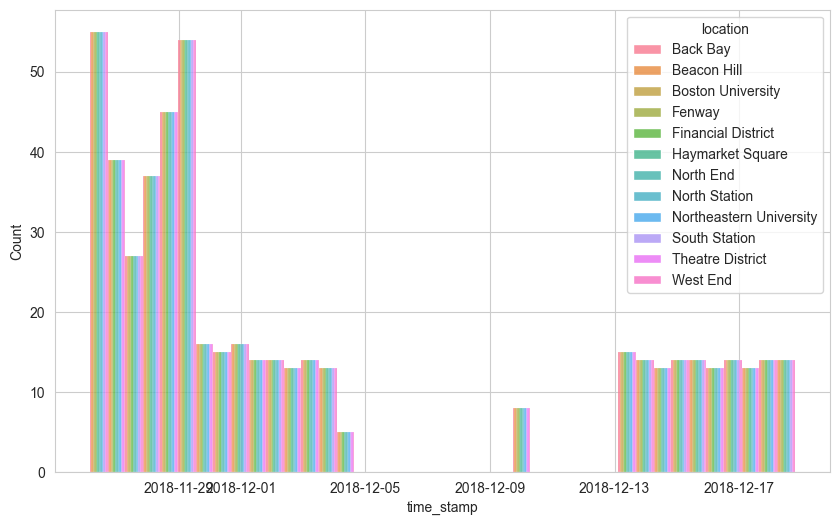

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(weather, x='time_stamp', hue='location',bins=40,multiple="dodge")
plt.show()

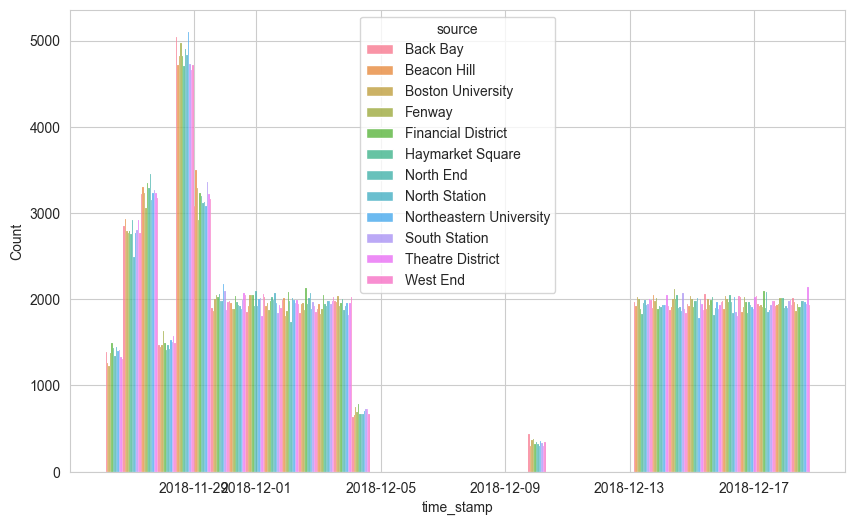

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(rides, x='time_stamp', hue='source',bins=40,multiple="dodge")
plt.show()

In [20]:
rides_hours = rides.assign(date_hour=lambda x: x['time_stamp'].dt.strftime('%Y-%m-%d %H:00'))

In [21]:
weather_hours = weather.assign(date_hour=lambda x: x['time_stamp'].dt.strftime('%Y-%m-%d %H:00')).drop(columns='time_stamp')

In [22]:
del rides
del weather
gc.collect()

29485

In [23]:
dest_wmap = {x:"dest_"+x for x in weather_hours.columns if x not in ['location','date_hour']}
dest_wmap['location']='destination'
source_wmap = {x:"source_"+x for x in weather_hours.columns if x not in ['location','date_hour']}
source_wmap['location']='source'

<Axes: xlabel='date_hour', ylabel='Count'>

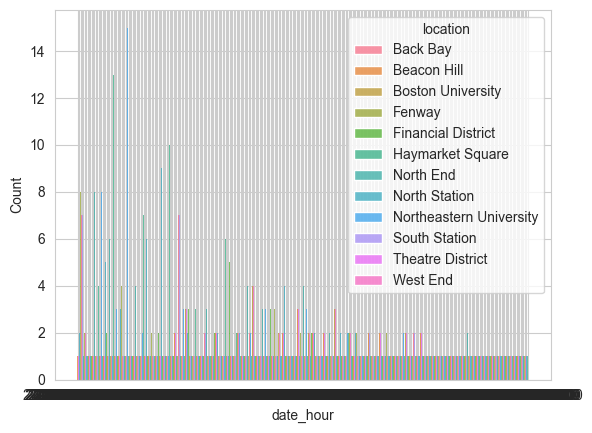

In [24]:
sns.histplot(weather_hours, x='date_hour', hue ='location', bins=40,multiple="dodge")

In [25]:
weather_hours=weather_hours.groupby(['date_hour','location']).mean().reset_index()

/var/folders/m4/j_mwks0x04ncx2w9srg4t8qh0000gn/T/ipykernel_12218/786841832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_hours=weather_hours.groupby(['date_hour','location']).mean().reset_index()


<Axes: xlabel='date_hour', ylabel='Count'>

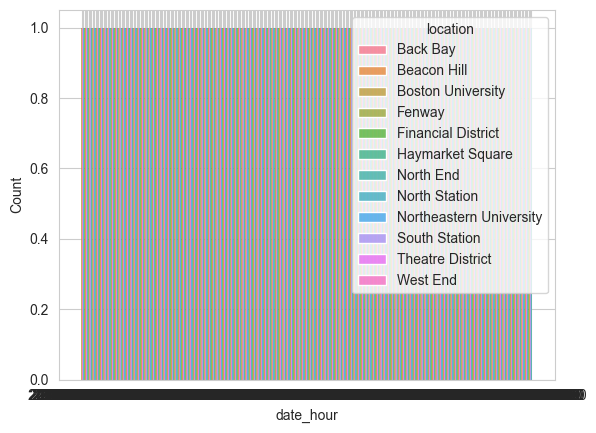

In [26]:
sns.histplot(weather_hours, x='date_hour', hue ='location',bins=40,multiple="dodge")

In [27]:
rides_hours.shape

(637976, 14)

In [28]:
data = rides_hours.merge(weather_hours.rename(columns=dest_wmap),on=['date_hour','destination'],how='left')
data = data.merge(weather_hours.rename(columns=source_wmap),on=['date_hour','source'])

In [29]:
del weather_hours
del rides_hours
gc.collect()

223

In [30]:
data=data.drop(columns=['destination','source'])

In [31]:
from sklearn.model_selection import train_test_split
# Perform train-test split
train_df, test_df = train_test_split(data, test_size=0.2, random_state=2025)

print(f"Training set size: {train_df.shape[0]}")
print(f"Test set size: {test_df.shape[0]}")

Training set size: 508193
Test set size: 127049


In [32]:
del data
gc.collect()

0

# Feature engineering

In [33]:
train_df['weekday']=train_df['time_stamp'].dt.weekday
train_df['is_weekend'] = (train_df['weekday']>5).map({True:1,False:0})
test_df['weekday']=test_df['time_stamp'].dt.weekday
test_df['is_weekend'] = (test_df['weekday']>5).map({True:1,False:0})
train_df['time_sin'] = np.sin(2 * np.pi * (train_df.time_stamp.dt.hour/24+train_df.time_stamp.dt.minute/60))
test_df['time_sin'] = np.sin(2 * np.pi * (test_df.time_stamp.dt.hour/24+test_df.time_stamp.dt.minute/60))

train_df=train_df.drop(columns=['time_stamp','date_hour'])
test_df=test_df.drop(columns=['time_stamp','date_hour'])

In [34]:
diffs = {x.split("_")[1] + '_diff': [x,'dest_' + x.split("_")[1]] for x in train_df.columns if x.startswith('source_')}
for res,x in diffs.items():
    train_df[res]=train_df[x[0]]-train_df[x[1]]
    test_df[res]=test_df[x[0]]-test_df[x[1]]

In [35]:
train_df

,Lyft,Uber,distance,price,surge_multiplier,name,source_latitude,source_longitude,dest_latitude,dest_longitude,dest_temp,dest_clouds,dest_pressure,dest_rain,dest_humidity,dest_wind,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,weekday,is_weekend,time_sin,latitude_diff,longitude_diff,temp_diff,clouds_diff,pressure_diff,rain_diff,humidity_diff,wind_diff
630636,0,1,1.00,7.5,1.00,1,42.3640,-71.0603,42.3601,-71.0571,44.8725,0.98,1006.0275,0.157213,0.87375,10.64625,43.8825,0.98125,1006.075,0.154725,0.90875,10.43125,1,0,-9.781476e-01,0.0039,-0.0032,-0.990,0.00125,0.0475,-0.002488,0.035,-0.215
185405,1,0,2.30,32.5,1.00,6,42.3570,-71.0733,42.3640,-71.0603,44.4250,0.98,1008.1300,0.070550,0.88000,9.69500,44.4300,0.98000,1008.095,0.091100,0.88000,9.55500,0,0,3.583679e-01,-0.0070,-0.0130,0.005,0.00000,-0.0350,0.020550,0.000,-0.140
77238,0,1,2.17,8.5,1.00,3,42.3655,-71.0625,42.3522,-71.0550,46.3200,0.92,999.4800,0.010161,0.94000,2.48000,46.2300,0.92000,999.480,0.010401,0.94000,2.51000,0,0,6.691306e-01,0.0133,-0.0075,-0.090,0.00000,0.0000,0.000240,0.000,0.030
6332,1,0,1.45,16.5,1.25,4,42.3601,-71.0700,42.3643,-71.0542,45.5500,0.91,1021.8600,0.003069,0.91000,6.49000,45.5300,0.91000,1021.870,0.002340,0.91000,6.39000,5,0,9.659258e-01,-0.0042,-0.0158,-0.020,0.00000,0.0100,-0.000729,0.000,-0.100
354940,0,1,2.14,8.0,1.00,1,42.3663,-71.0651,42.3522,-71.0550,43.6300,1.00,997.2750,0.018500,0.90500,10.45500,44.1000,1.00000,997.180,0.020350,0.91000,12.32500,1,0,1.224647e-16,0.0141,-0.0101,0.470,0.00000,-0.0950,0.001850,0.005,1.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223116,0,1,1.97,22.5,1.00,5,42.3643,-71.0542,42.3601,-71.0700,23.9800,0.50,1008.7900,0.071350,0.51000,14.93000,23.9100,0.50000,1008.770,0.075725,0.51000,15.03000,1,0,1.000000e+00,0.0042,0.0158,-0.070,0.00000,-0.0200,0.004375,0.000,0.100
595155,0,1,2.62,9.5,1.00,3,42.3500,-71.0622,42.3505,-71.1054,43.8850,1.00,994.8050,0.016000,0.92500,10.42000,43.8150,1.00000,994.790,0.008650,0.93500,10.64500,1,0,9.781476e-01,-0.0005,0.0432,-0.070,0.00000,-0.0150,-0.007350,0.010,0.225
49475,0,1,1.10,14.5,1.00,5,42.3570,-71.0733,42.3383,-71.0892,39.4800,1.00,1009.7400,0.007000,0.93000,10.23000,39.3700,1.00000,1010.050,0.006000,0.93000,10.38000,0,0,-1.000000e+00,0.0187,0.0159,-0.110,0.00000,0.3100,-0.001000,0.000,0.150
359928,1,0,1.54,11.0,1.00,3,42.3570,-71.0733,42.3505,-71.1054,44.4400,0.37,1022.0400,0.085131,0.69000,7.60000,44.3500,0.36000,1022.040,0.081680,0.69000,7.84000,5,0,9.659258e-01,0.0065,0.0321,-0.090,-0.01000,0.0000,-0.003451,0.000,0.240


# Numerical data processing

In [36]:
he.check_outliers(train_df)

distance


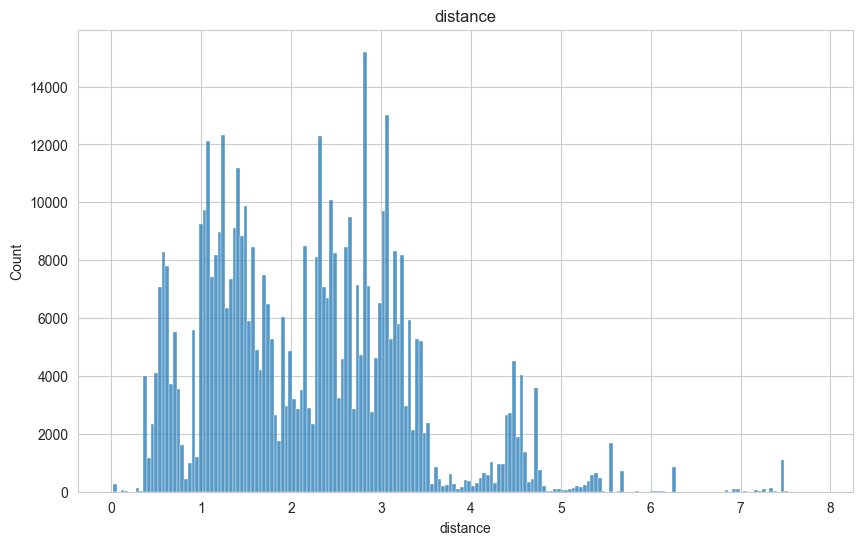

price


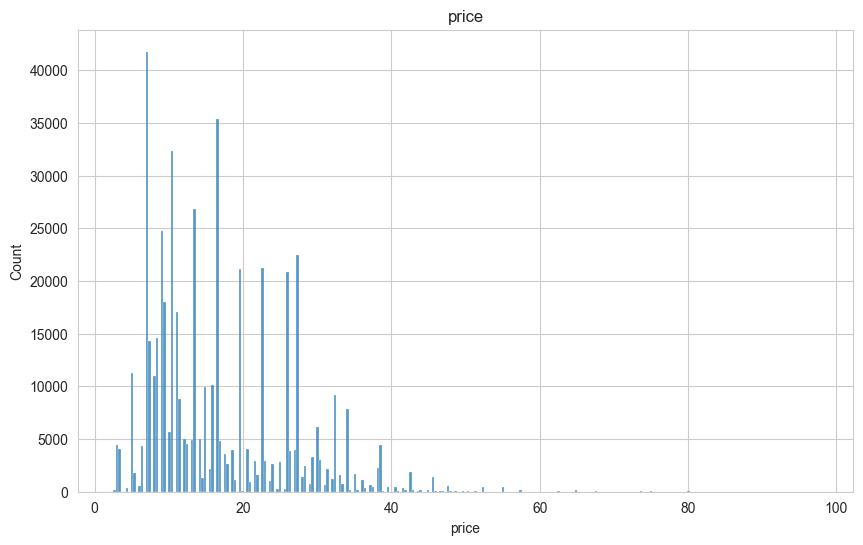

surge_multiplier


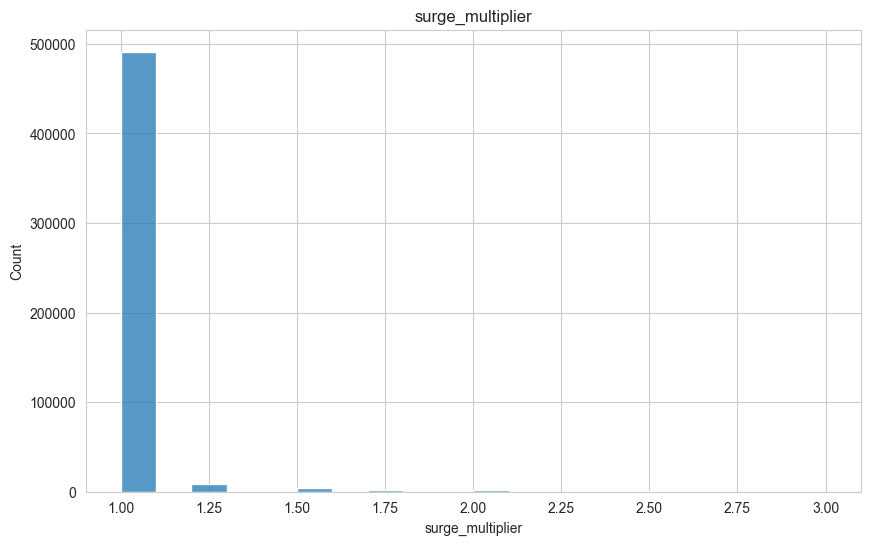

source_latitude


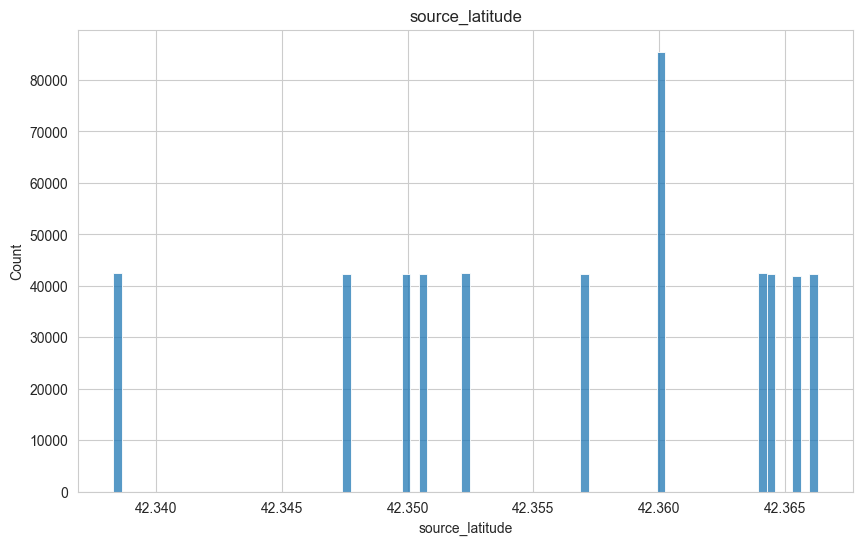

source_longitude


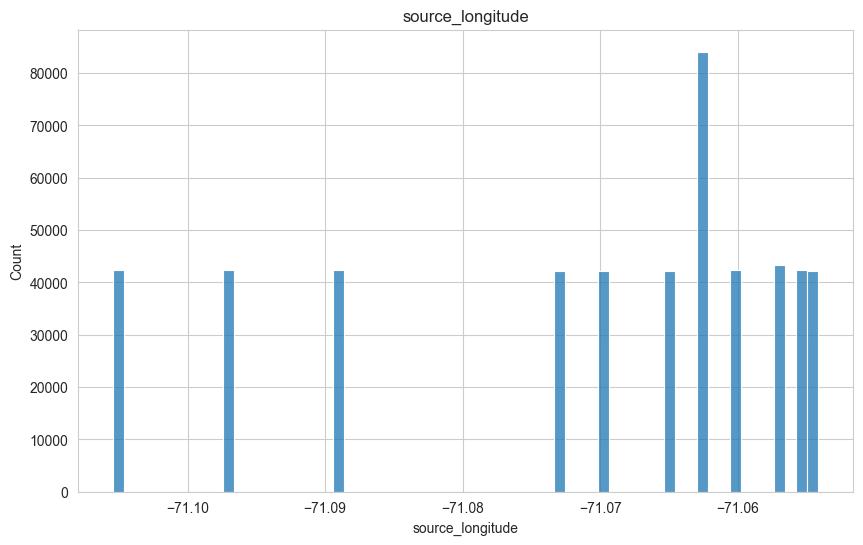

dest_latitude


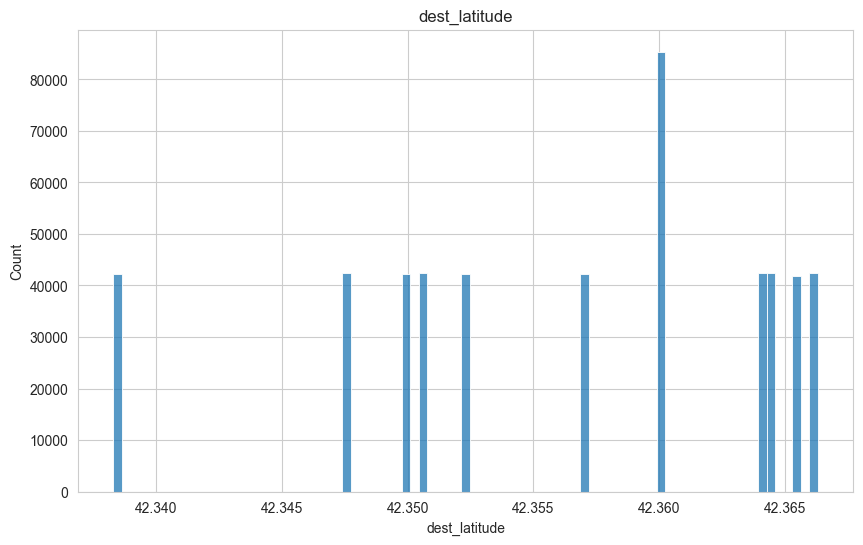

dest_longitude


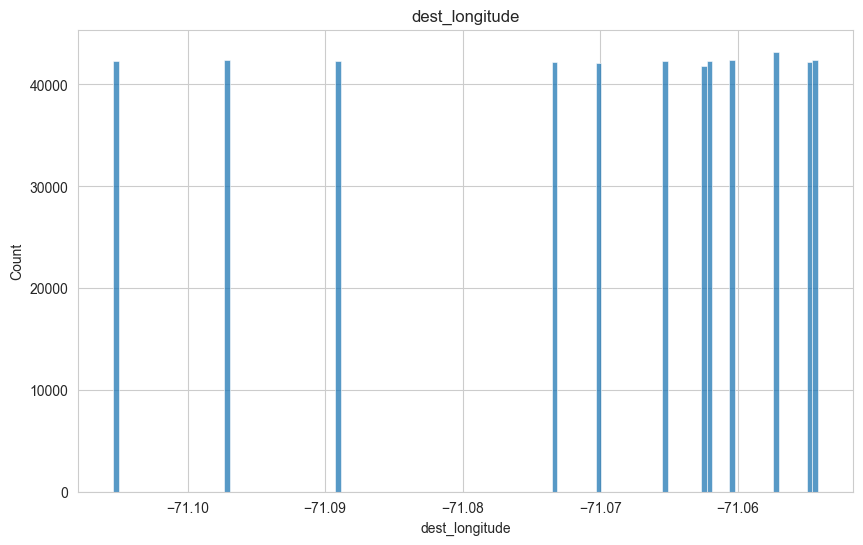

dest_temp


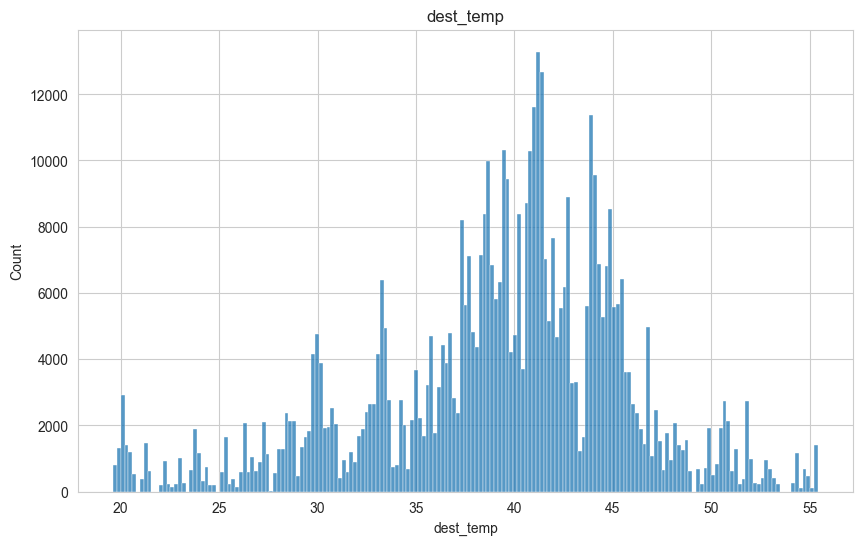

dest_clouds


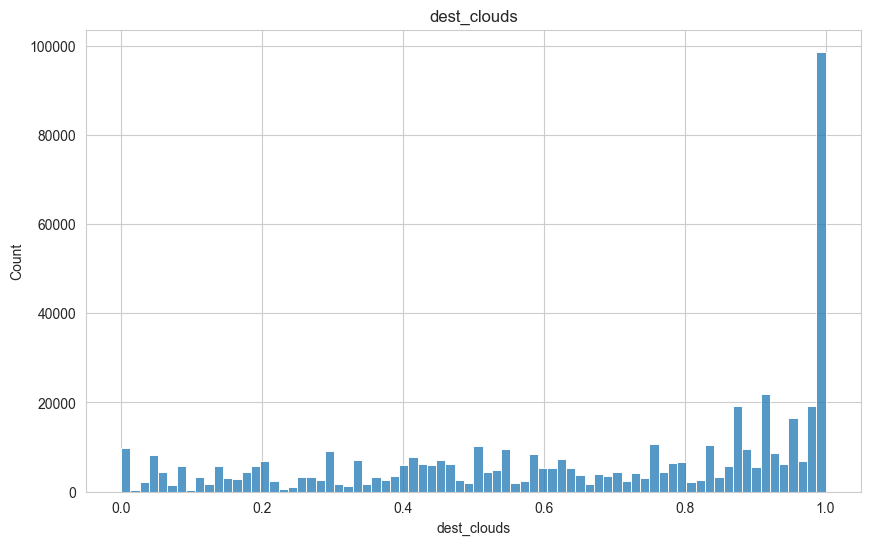

dest_pressure


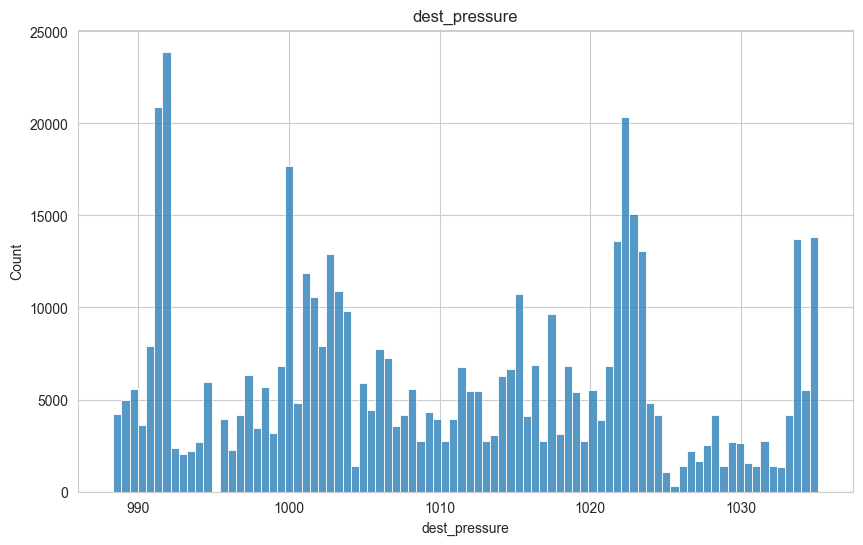

dest_rain


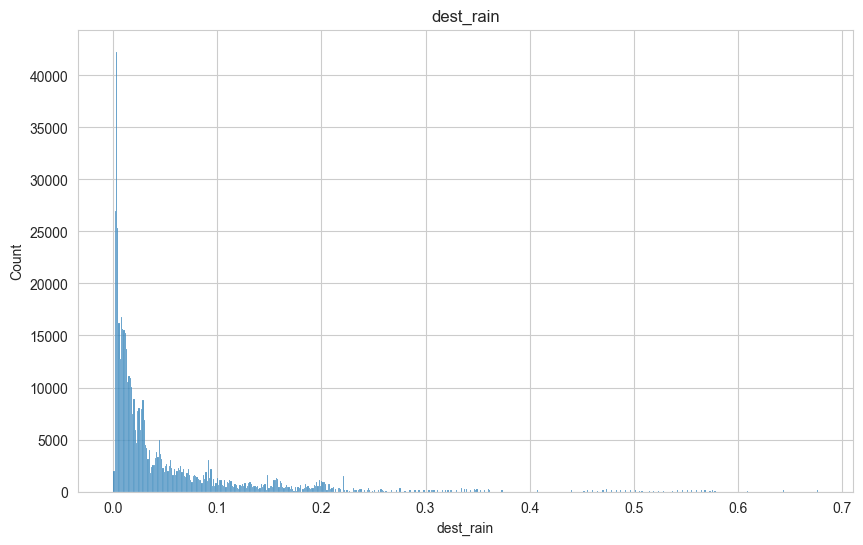

dest_humidity


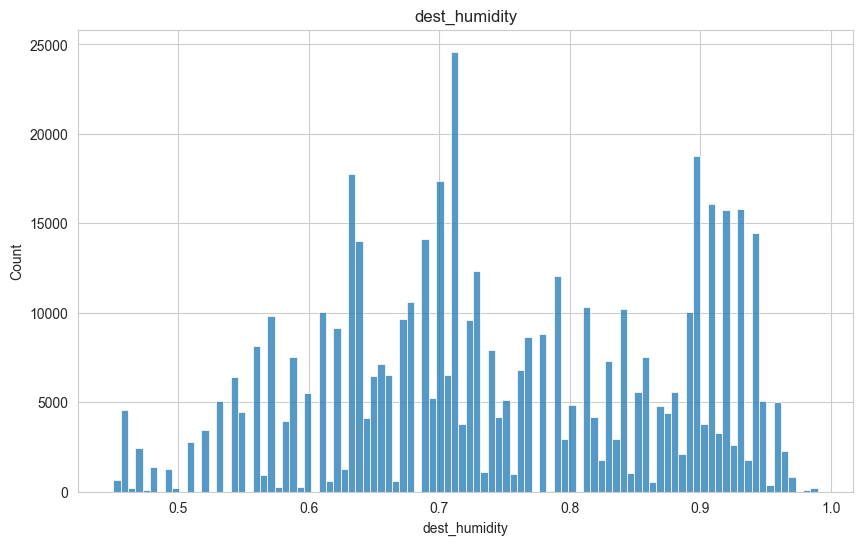

dest_wind


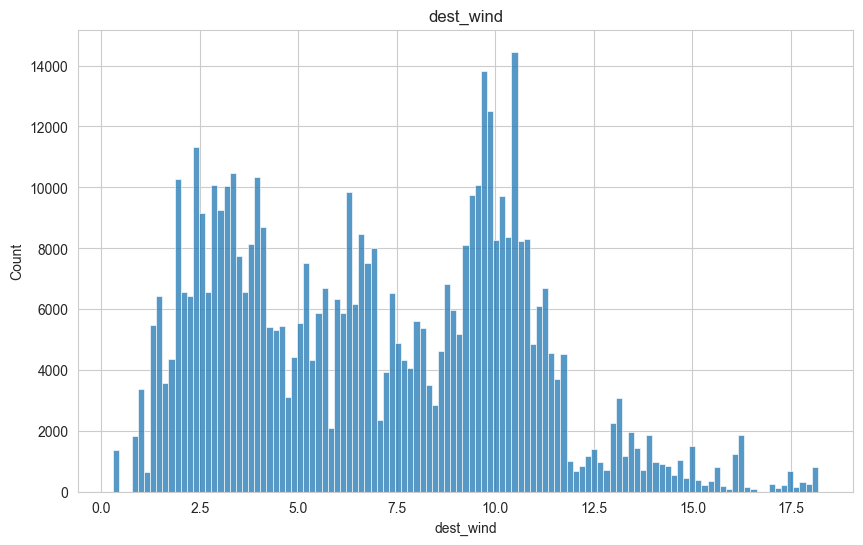

source_temp


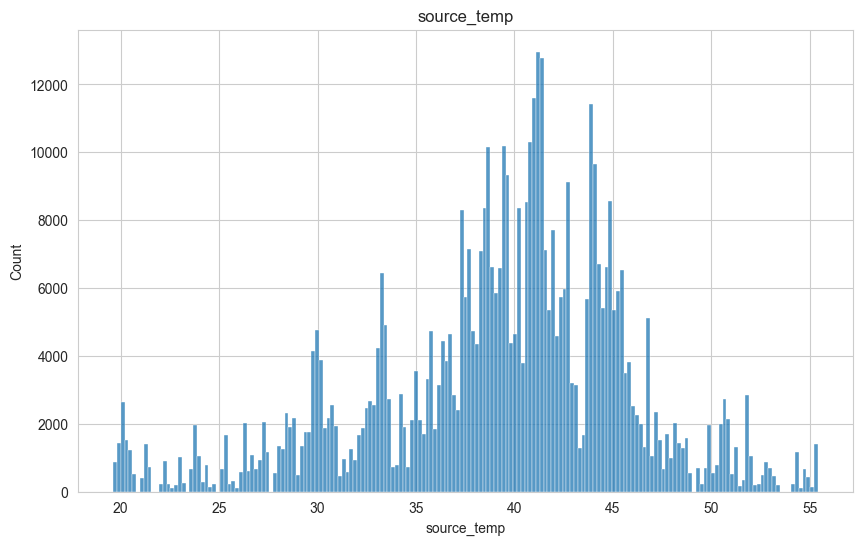

source_clouds


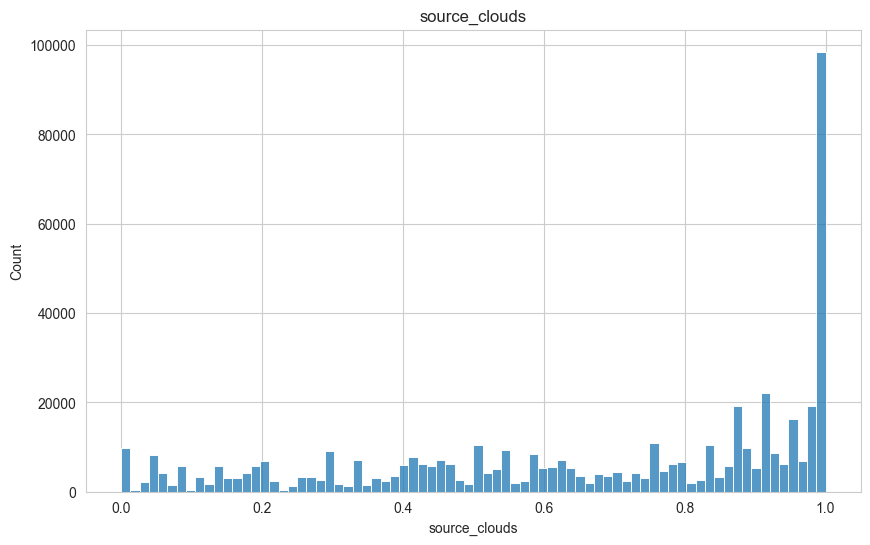

source_pressure


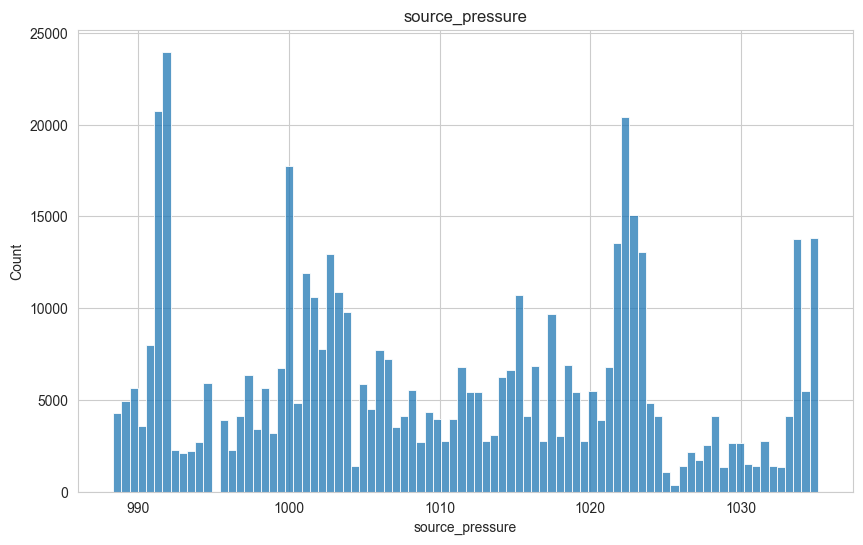

source_rain


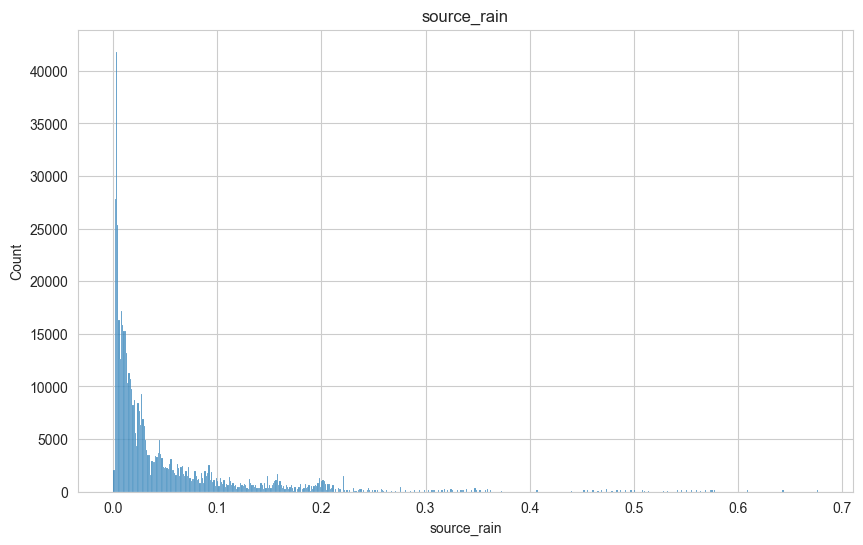

source_humidity


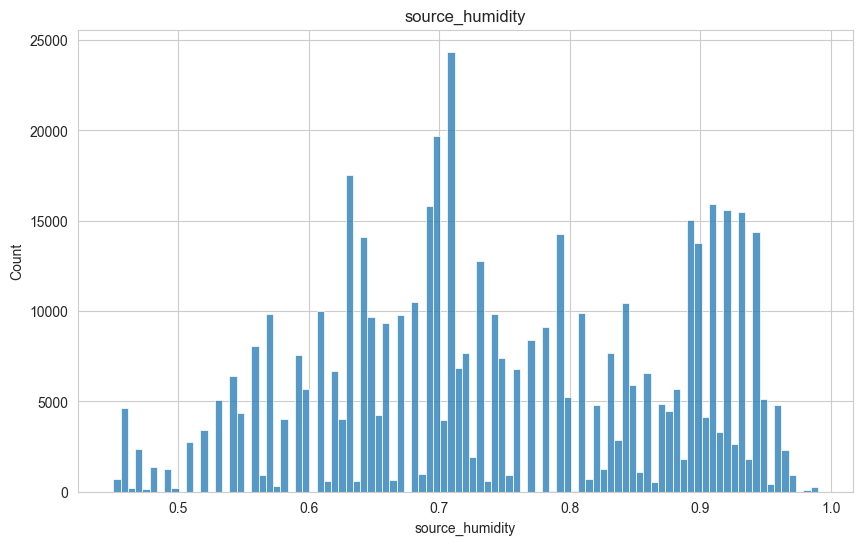

source_wind


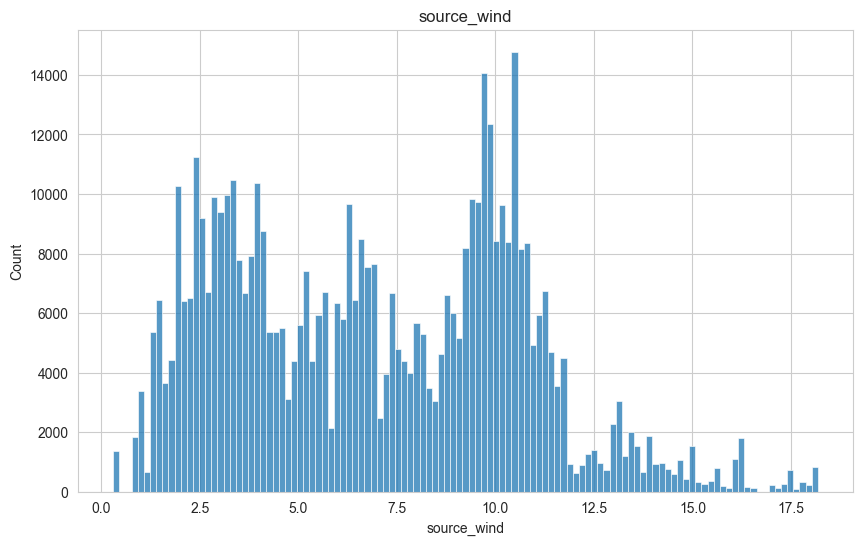

time_sin


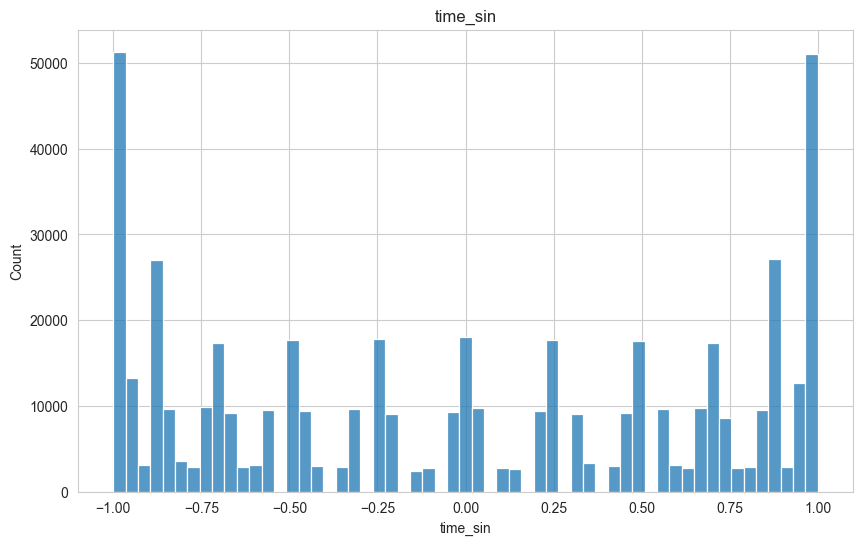

latitude_diff


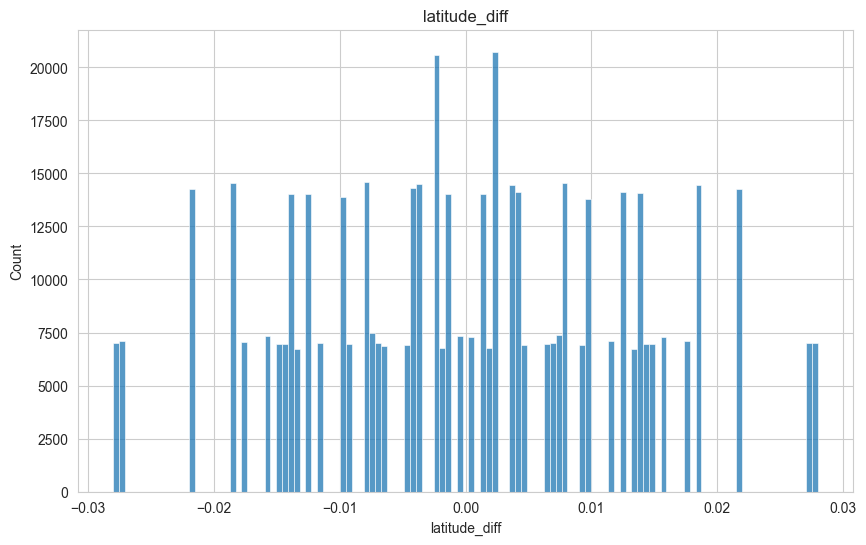

longitude_diff


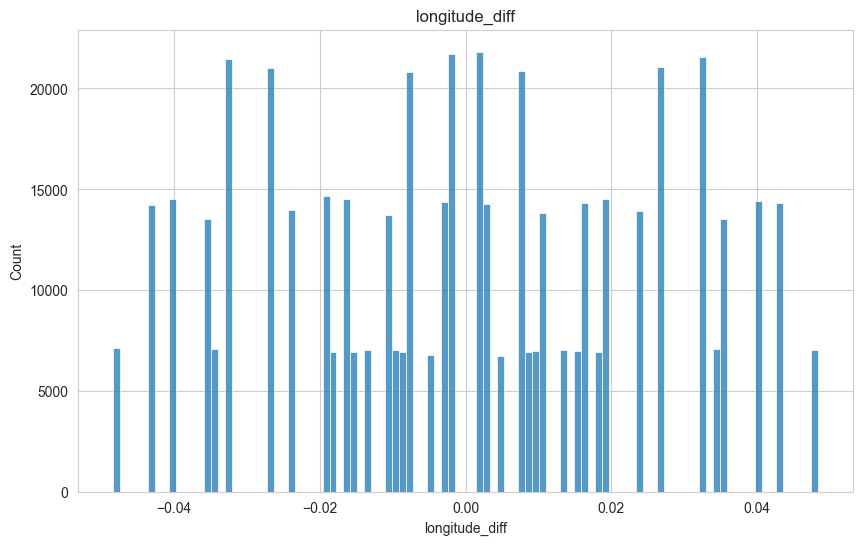

temp_diff


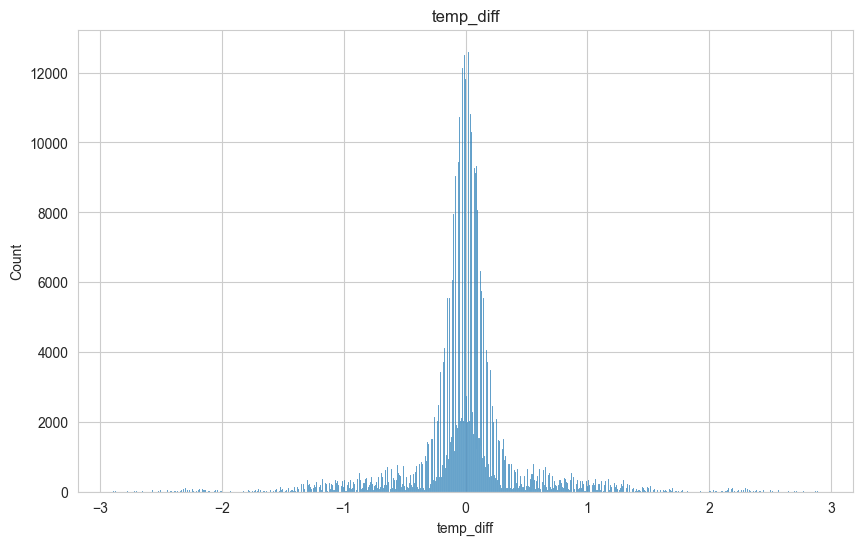

clouds_diff


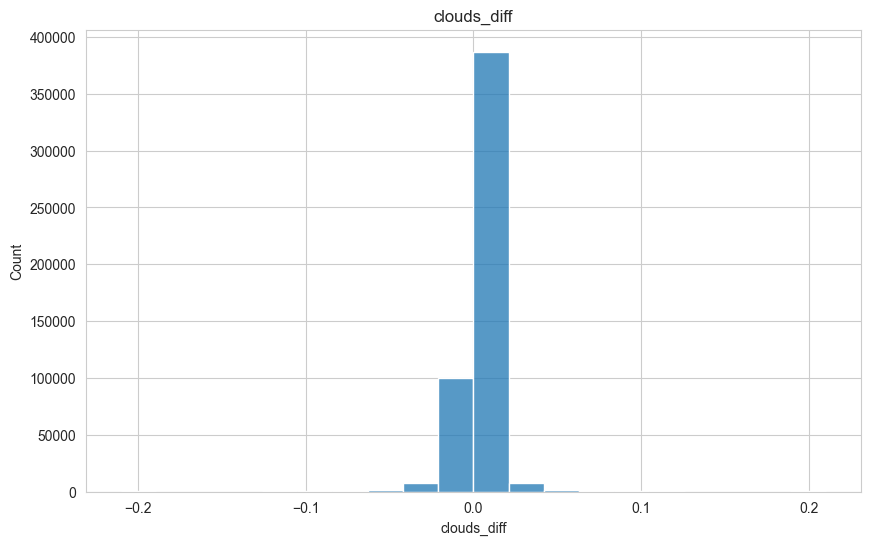

pressure_diff


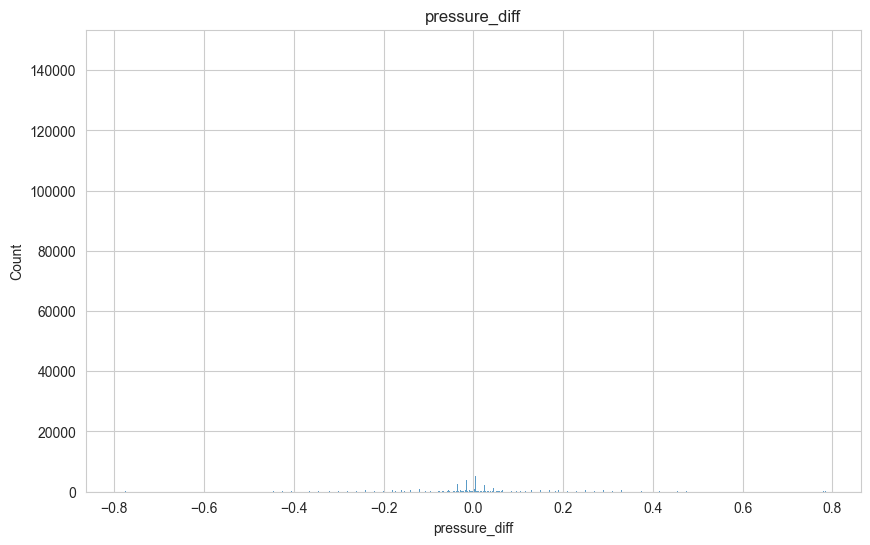

rain_diff


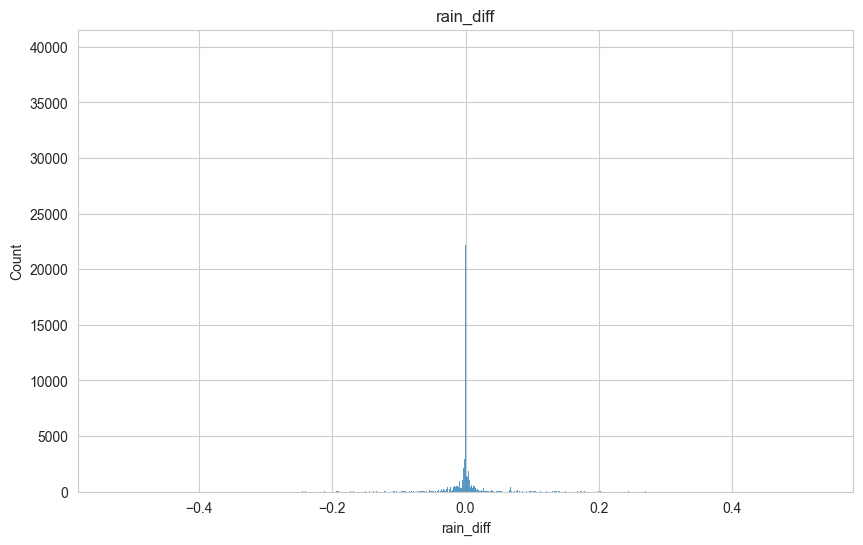

humidity_diff


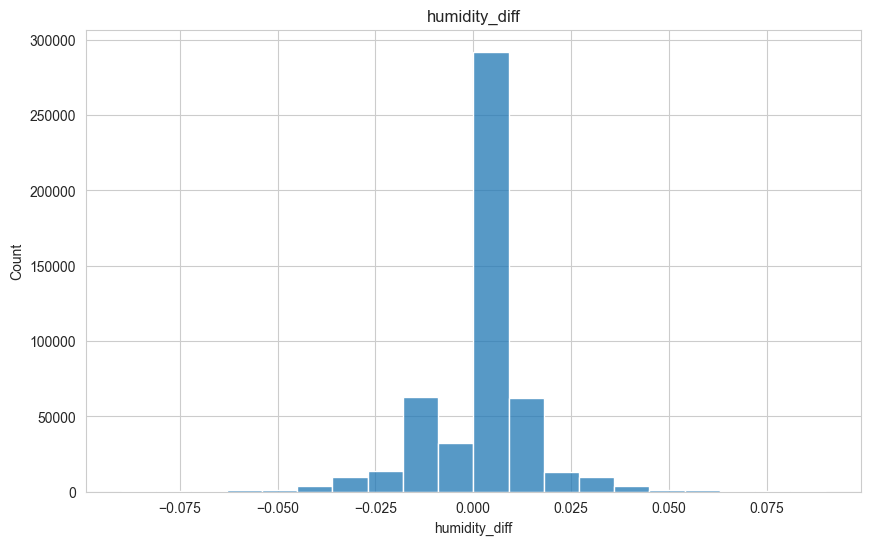

wind_diff


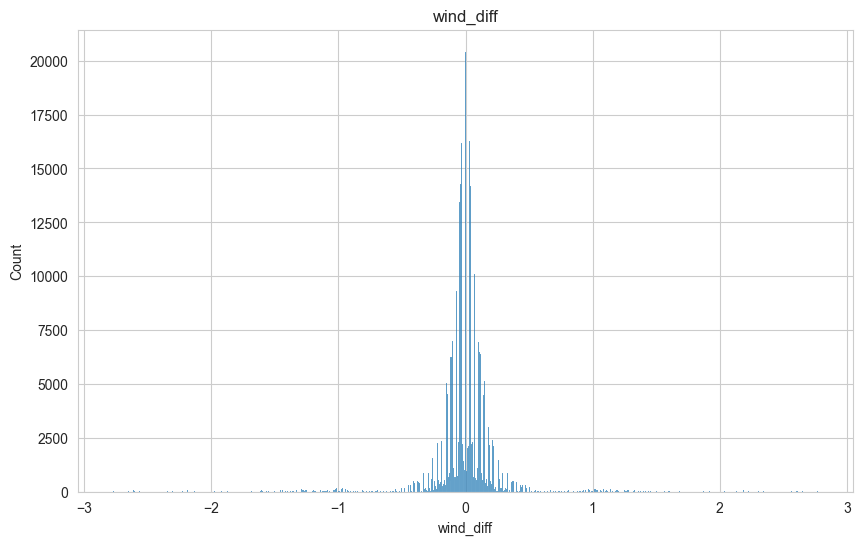

In [37]:
for col in [x for x in train_df.columns if train_df[x].dtype=='float']:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[col])
    plt.title(col)
    print(col)
    plt.show()

In [38]:
num_process_params={
    'winsorize':[],
    "normalize":['distance',
                'dest_temp',
                'source_temp',
                'source_temp',
                'temp_diff',
                'dest_rain',
                'source_rain'
                ],
    'standardize':['source_latitude',
                'source_longitude',
                'dest_latitude',
                'dest_longitude',
                'dest_clouds',
                'dest_pressure',
                'dest_humidity',
                'dest_wind',
                'source_clouds',
                'source_pressure',
                'source_humidity',
                'source_wind'],
    'log':[],
    'none':['price',
            'surge_multiplier',
            'latitude_diff',
            'longitude_diff',
            'clouds_diff',
            'pressure_diff',
            'rain_diff',
            'humidity_diff',
            'wind_diff',
            'time_sin',
            'Lyft',
            'Uber',
            'price',
            'surge_multiplier',
            'name',
            'is_weekend',
            ]
}

In [39]:
# train_df,test_df=
train_df,test_df=he.process_num(train_df,test_df,num_process_params)

In [40]:
train_df.to_pickle("../data/outputs/2.feature_engineering/train_df.pkl")
test_df.to_pickle("../data/outputs/2.feature_engineering/test_df.pkl")

In [41]:
del train_df
del test_df
gc.collect()

269

# Feature selection

In [2]:
train_df=pd.read_pickle("../data/outputs/2.feature_engineering/train_df.pkl")
test_df=pd.read_pickle("../data/outputs/2.feature_engineering/test_df.pkl")

In [3]:
he.get_feat_rank_corr(train_df,{'target':'price'})

,variable,corr,corr_rank
name,name,0.835019,1
distance,distance,0.345631,2
surge_multiplier,surge_multiplier,0.239331,3
dest_longitude,dest_longitude,-0.113620,4
source_longitude,source_longitude,-0.109930,5
source_latitude,source_latitude,-0.094977,6
Lyft,Lyft,0.082487,7
Uber,Uber,-0.082487,7
dest_latitude,dest_latitude,-0.071774,9
latitude_diff,latitude_diff,-0.015111,10


In [4]:
import funs.helpers_2 as he
import importlib
importlib.reload(he)
import funs.helpers_2 as he

In [ ]:
fs_params = {
    'target':'price',
    'method':'forward',
    'n_vars':20,
    'kwarg':'SVM',
}
train_selected, test_selected, metrics = he.select_features(train_df,test_df,fs_params)

In [ ]:
fs_params = {
    'target':'price',
    'method':'forward',
    'n_vars':20,
    'kwarg':'GBM',
}
he.select_features(train_df,test_df,fs_params)